**Autor: Jan Jagodzi≈Ñski, nr indeksu: 448262.**


# Zadanie 1



In [551]:
import pandas as pd
import plotly.express as px
import numpy as np
from scipy.stats import norm, uniform, spearmanr, shapiro, chi2_contingency, chi2, nct, mannwhitneyu, pareto
from scipy.stats  import t as tstud
import statsmodels.api as sm
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sb
from importlib import reload
import statsmodels.api as sm



In [552]:
df = pd.read_csv('dane_projekt1.csv', sep=';')

In [553]:
df.describe()

id        waga      wzrost        plec      dzieci        wiek  \
count  310.000000  310.000000  310.000000  310.000000  310.000000  310.000000   
mean   155.500000   79.814742  172.726774    1.458065    2.003226   56.241935   
std     89.633513    3.292902    6.906733    0.499044    1.352209    6.746653   
min      1.000000   68.890000  155.670000    1.000000    0.000000   37.000000   
25%     78.250000   77.430000  167.090000    1.000000    1.000000   52.000000   
50%    155.500000   79.890000  172.815000    1.000000    2.000000   56.000000   
75%    232.750000   82.112500  178.032500    2.000000    3.000000   61.000000   
max    310.000000   86.730000  190.790000    2.000000    5.000000   77.000000   

             dochod  oszczednosci     jednoos     miejsce   wydatki_zyw  
count    310.000000    310.000000  310.000000  310.000000    310.000000  
mean    1519.658000    945.994839    0.429032    2.003226     12.383097  
std     1293.464325    787.601212    0.495738    0.739537   3232.382607  
min      645.270000   -204.240000    0.000000    1.000000 -55640.190000  
25%      966.807500    392.545000    0.000000    1.000000    199.757500  
50%     1190.840000    741.190000    0.000000    2.000000    249.265000  
75%     1620.460000   1270.222500    1.000000    3.000000    283.267500  
max    17412.240000   5485.220000    1.000000    3.000000    301.690000

Mamy 310 obserwacji. Zmiennych jako≈õciowych jest  3: p≈Çeƒá (plec) , status gospodarstwa (jednoos), wielko≈õƒá miejscowo≈õci (miejsce), natomiast danych ilo≈õciowych jest 7: waga, wzrost, liczba dzieci (dzieci), wiek, doch√≥d (dochod), oszczƒôdno≈õci (oszczednosci), wydatki na ≈ºywno≈õƒá (wydatki_zyw), przy czym zmienna dzieci jest dykretna. Nie ma brak√≥w w danych, jednak istniejƒÖ nieprawid≈Çowo≈õci - ujemne wydatki na ≈ºywno≈õƒá. W przeciwie≈Ñstwie do ujemnych oszczƒôdno≈õci, nie ma uzasadnionych ujemnych warto≈õci dla tej zmiennej, dlatego odrzucimy nieprawid≈Çowe obserwacje.

Pozbƒôdƒô siƒô tych nieprawid≈Çowo≈õci. Najpierw jednak zmieniƒô w DataFramie indeksowanie, aby indeksem g≈Ç√≥wnym by≈Ço 'id'.

In [554]:
n = len(pd.unique(df['id']))
print(n)

310


Dokona≈Çem sprawdzenia, ka≈ºda obserwacja ma inne id. Zatem zmieniam indeksowanie.

In [555]:
df = df.set_index('id')
df = df.sort_values('id')

Usuwam nieprawid≈Çowe obserwacje.

In [556]:
df = df.drop(axis = 0, labels = df[df['wydatki_zyw'] < 0].index)

In [557]:
df.describe()

waga      wzrost        plec      dzieci        wiek  \
count  304.000000  304.000000  304.000000  304.000000  304.000000   
mean    79.819309  172.805757    1.463816    1.990132   56.259868   
std      3.303614    6.935242    0.499511    1.341112    6.782444   
min     68.890000  155.670000    1.000000    0.000000   37.000000   
25%     77.415000  167.130000    1.000000    1.000000   51.750000   
50%     79.895000  172.890000    1.000000    2.000000   56.500000   
75%     82.142500  178.117500    2.000000    3.000000   61.000000   
max     86.730000  190.790000    2.000000    5.000000   77.000000   

            dochod  oszczednosci     jednoos     miejsce  wydatki_zyw  
count   304.000000    304.000000  304.000000  304.000000   304.000000  
mean   1389.315724    887.975954    0.417763    2.000000   235.571151  
std     660.781113    668.759849    0.494004    0.740172    57.232769  
min     645.270000   -204.240000    0.000000    1.000000    56.270000  
25%     965.830000    384.657500    0.000000    1.000000   204.207500  
50%    1181.350000    722.325000    0.000000    2.000000   250.465000  
75%    1613.947500   1236.880000    1.000000    3.000000   284.110000  
max    4780.150000   3390.590000    1.000000    3.000000   301.690000

Pozbyli≈õmy siƒô sze≈õciu obserwacji ('id' od 305 do 310). Pozosta≈Çe dane wydajƒÖ siƒô byƒá prawid≈Çowe.

**P≈ÅEƒÜ**

W naszej pr√≥bie, 53.6% os√≥b to kobiety. Prawdopodobnie w Bajtocji mieszka wiƒôcej kobiet ni≈º mƒô≈ºczyzn, co jeszcze sprawdzimy.

In [558]:
plec_dict = {1 : 'kobieta', 2 : 'mƒô≈ºczyzna'}
plec_freq = df.sort_values('plec')['plec'].map(plec_dict).value_counts(sort = False)
print(plec_freq)
print( df.sort_values('plec')['plec'].map(plec_dict).value_counts(normalize = True, sort = False))

plec
kobieta      163
mƒô≈ºczyzna    141
Name: count, dtype: int64
plec
kobieta      0.536184
mƒô≈ºczyzna    0.463816
Name: proportion, dtype: float64


 **WZROST**

≈öredni wzrost mieszka≈Ñca to ok. 172.8 cm. Odchylenie standardowe to ok. 6,94 cm.
Zmienna 'wzrost' ma rozk≈Çad normalny o ≈õredniej r√≥wnej ≈õredniemu wzrostowi w populacji i odchyleniu standardowemu r√≥wnemu odchyleniu standardowemu w populacji.

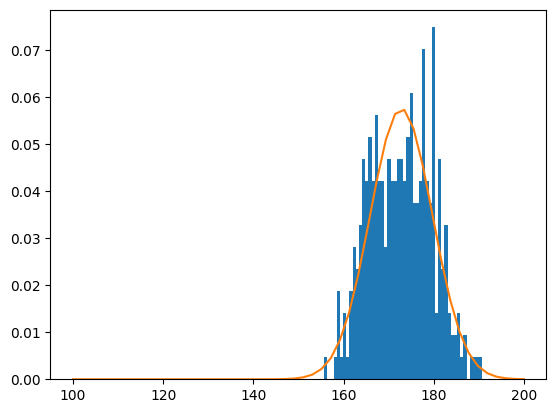

In [559]:
x = np.linspace(100, 200)
y = norm.pdf(x, np.mean(df['wzrost']), np.std(df['wzrost']))
plt.hist(df['wzrost'], bins = 50, density = True)
plt.plot(x,y)
plt.show()

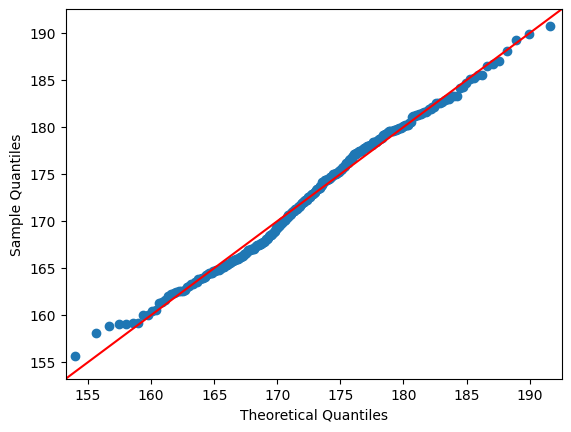

In [560]:
sm.qqplot(df['wzrost'], line = '45', loc = np.mean(df['wzrost']), scale = np.std(df['wzrost']));

In [561]:
sw_test_wzrost = shapiro(df['wzrost'])
print('p-value = ' + str(sw_test_wzrost.pvalue))

p-value = 0.02431187406182289


R√≥wnie≈º p-value w te≈õcie Shapiro-Wilka m√≥wi, ≈ºe nie mo≈ºemy odrzuciƒá tezy o normalno≈õci rozk≈Çadu wzrostu w populacji przy poziomie istotno≈õci 0.01.

**DZIECI**

Liczba dzieci jest zmiennƒÖ dyskretnƒÖ, przedstawiam jƒÖ wiƒôc w tabeli czƒôsto≈õci. DominantƒÖ jest 1 - ok. 29% os√≥b ma jedno dziecko - natomiast mieszkaniec ma ≈õrednio 1.99, czyli niemal dw√≥jkƒô dzieci, odchylenie standardowe jest stosunkowo du≈ºe, bo to zmienna dyskretna o warto≈õciach ca≈Çkowitych. Od jednego dziecka wzwy≈º, tendencja wystƒôpowania w populacji jest spadkowa przy rosnƒÖcej liczbie dzieci.

In [562]:
dzieci_freq = df.sort_values('dzieci')['dzieci'].value_counts(sort = False)
print(dzieci_freq)
print(df.sort_values('dzieci')['dzieci'].value_counts(normalize = True, sort = False))

dzieci
0    38
1    89
2    74
3    56
4    35
5    12
Name: count, dtype: int64
dzieci
0    0.125000
1    0.292763
2    0.243421
3    0.184211
4    0.115132
5    0.039474
Name: proportion, dtype: float64


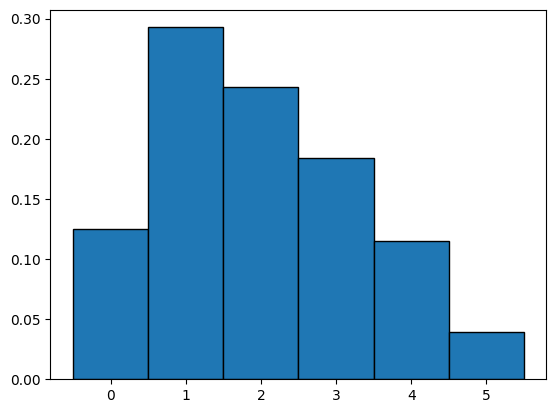

In [563]:
plt.hist(df['dzieci'], np.arange(-0.5, 6), density = True, edgecolor = 'black' )
plt.show()

**RODZAJ MIESZKANIA**

Oko≈Ço 58% mieszka≈Ñc√≥w ≈ºyje w gospodarstwie wieloosobowym, pozosta≈Çe ok. 42% w jednoosobowym.

In [564]:
jednoos_freq = df.sort_values('jednoos')['jednoos'].value_counts(sort = False)
print(jednoos_freq)
print(df.sort_values('jednoos')['jednoos'].value_counts(normalize = True, sort = False))

jednoos
0    177
1    127
Name: count, dtype: int64
jednoos
0    0.582237
1    0.417763
Name: proportion, dtype: float64


**MIEJSCE ZAMIESZKANIA**

W populacji przewa≈ºajƒÖ osoby mieszkajƒÖce w ≈õrednich miejscowo≈õciach (od 10 000 do 100 000 mieszka≈Ñc√≥w) - ok 45%. W≈õr√≥d pozosta≈Çych ok 55%, niemal dok≈Çadnie jedna po≈Çowa mieszka w miejscowo≈õciach do 10 000 mieszka≈Ñc√≥w, a druga w miejscowo≈õciach powy≈ºej 100 000 mieszka≈Ñc√≥w.

In [565]:
miejsce_freq = df.sort_values('miejsce')['miejsce'].value_counts(sort = False)
print(miejsce_freq)
print( df.sort_values('miejsce')['miejsce'].value_counts(normalize = True, sort = False))

miejsce
1     83
2    138
3     83
Name: count, dtype: int64
miejsce
1    0.273026
2    0.453947
3    0.273026
Name: proportion, dtype: float64


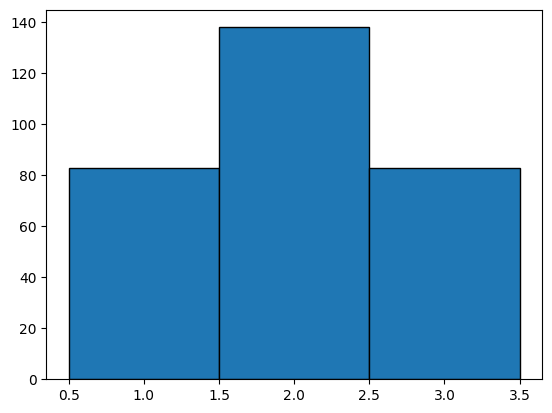

In [566]:

plt.hist(df['miejsce'], np.arange(0.5, 4),  edgecolor = 'black')
plt.show()

**WIEK**

Wiek mieszka≈Ñc√≥w Bajtocji ma rozk≈Çad normalny - w szczeg√≥lno≈õci widaƒá to na wykresie kwantyl-kwantyl. Przy ≈õrednim wieku r√≥wnym 56.23, po≈Çowa ma ponad 56.5 lat, a druga mniej.

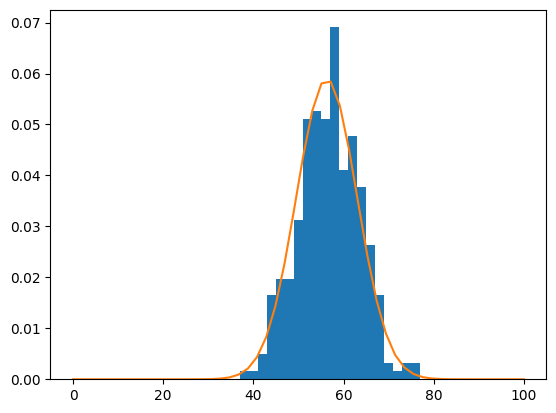

In [567]:
x = np.linspace(0, 100)
y = norm.pdf(x, np.mean(df['wiek']), np.std(df['wiek']))
plt.hist(df['wiek'], bins = 20, density = True)
plt.plot(x,y)
plt.show()

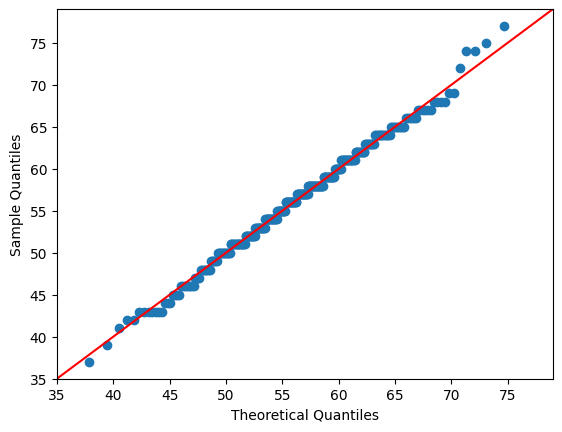

In [568]:
sm.qqplot(df['wiek'], line = '45', loc = np.mean(df['wiek']), scale = np.std(df['wiek']));

In [569]:
sw_test_wiek = shapiro(df['wiek'])
print('p-value = ' + str(sw_test_wiek.pvalue))

p-value = 0.42118239402770996


R√≥wnie≈º p-value w te≈õcie Shapiro-Wilka m√≥wi, ≈ºe nie mo≈ºemy odrzuciƒá tezy o normalno≈õci rozk≈Çadu wieku w populacji przy poziomie istotno≈õci 0.01.

**WAGA**

Waga mieszka≈Ñc√≥w Bajtocji jest zmiennƒÖ o rozk≈Çadzie normalnym. ≈örednia waga mieszka≈Ñca w naszej pr√≥bie to 79.8kg, warto≈õƒá bardzo bliska medianie.

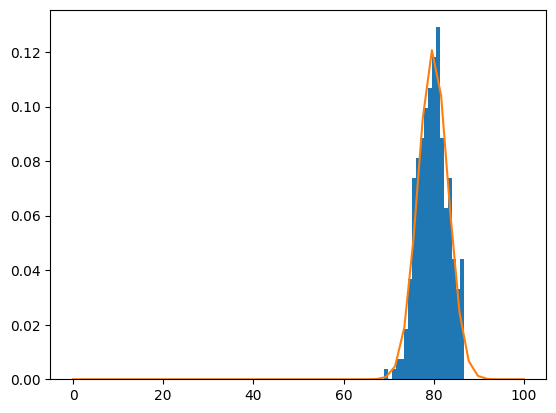

In [570]:
x = np.linspace(0, 100)
y = norm.pdf(x, np.mean(df['waga']), np.std(df['waga']))
plt.hist(df['waga'], bins = 20, density = True)
plt.plot(x,y)
plt.show()

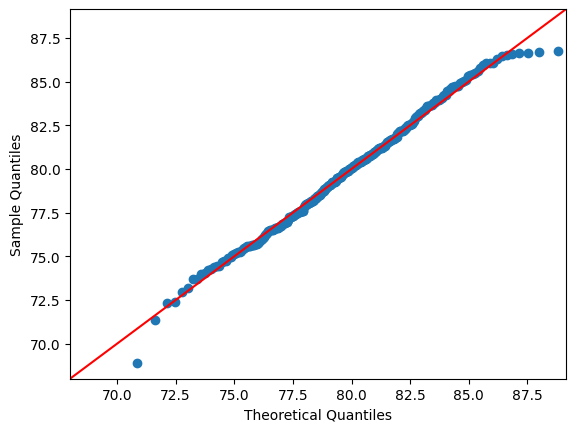

In [571]:
sm.qqplot(df['waga'], line = '45', loc = np.mean(df['waga']), scale = np.std(df['waga']));

In [572]:
sw_test_waga = shapiro(df['waga'])
print('p-value = ' + str(sw_test_waga.pvalue))

p-value = 0.15905901789665222


R√≥wnie≈º p-value w te≈õcie Shapiro-Wilka m√≥wi, ≈ºe nie mo≈ºemy odrzuciƒá tezy o normalno≈õci rozk≈Çadu wagi w populacji przy poziomie istotno≈õci 0.01.

 **DOCH√ìD**

≈öredni doch√≥d mieszka≈Ñca to ok. 1389 bajtalar√≥w. Odchylenie standardowe to ok. 661 bajtalar√≥w. Najbogatszy mieszkaniec w naszej pr√≥bie zarabia ok. 7.41 raza wiƒôcej od mieszka≈Ñca o najni≈ºszym dochodzie. Rozk≈Çad jest daleki od normalnego - mediana wynosi 1181.35, co jest znacznie bli≈ºej najni≈ºszego zarobku, ni≈º najwy≈ºszego.

In [573]:
df['dochod'].median()

1181.35

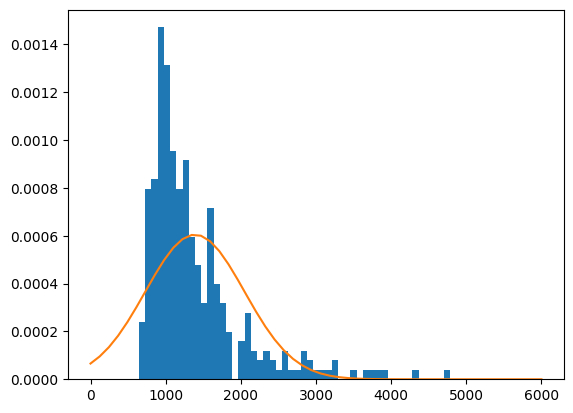

In [574]:
x = np.linspace(0, 6000)
y = norm.pdf(x, np.mean(df['dochod']), np.std(df['dochod']))
plt.hist(df['dochod'], bins = 50, density = True)
plt.plot(x,y)
plt.show()

In [575]:
sw_test_dochod = shapiro(df['dochod'])
print('p-value = ' + str(sw_test_dochod.pvalue))

p-value = 1.8411225807961608e-19


Jako, ≈ºe p-value wyra≈∫nie poni≈ºej poziomu istotno≈õci 0.01, odrzucamy rozk≈Çad normalny dochodu w spo≈Çecze≈Ñstwie Bajtocji.

**WYDATKI NA ≈ªYWNO≈öƒÜ**

Mieszkaniec Bajtocji z naszego zbioru danych wydaje ≈õrednio 235.57 bajtalar√≥w miesiƒôcznie na ≈ºywno≈õƒá. Rozk≈Çad ponownie nie przypomina rozk≈Çadu normalnego - wzglƒôdnie du≈ºo os√≥b wydaje na jedzenie nieznacznie mniej od maksimum - wynosi ono 301.69 bajtalar√≥w, a ponad po≈Çowa mieszka≈Ñc√≥w wydaje ponad 250 bajtalar√≥w miesiƒôcznie na ≈ºywno≈õƒá.

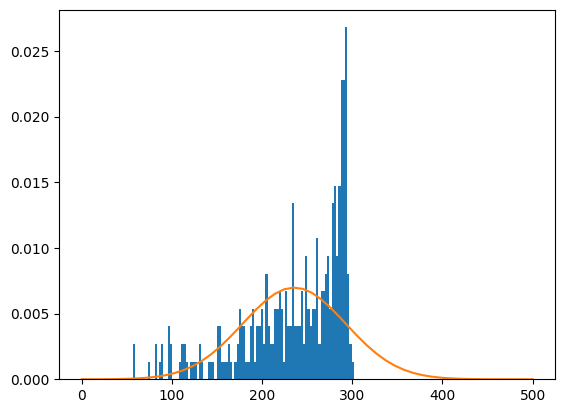

In [576]:
x = np.linspace(0, 500)
y = norm.pdf(x, np.mean(df['wydatki_zyw']), np.std(df['wydatki_zyw']))
plt.hist(df['wydatki_zyw'], bins = 100, density = True)
plt.plot(x,y)
plt.show()

In [577]:
sw_test_zyw = shapiro(df['wydatki_zyw'])
print('p-value = ' + str(sw_test_zyw.pvalue))

p-value = 8.07167256888482e-15


Jako, ≈ºe p-value wyra≈∫nie poni≈ºej poziomu istotno≈õci 0.01, odrzucamy rozk≈Çad normalny wydatk√≥w na ≈ºywno≈õƒá w spo≈Çecze≈Ñstwie Bajtocji.

**OSZCZƒòDNO≈öCI**

Oszczƒôdno≈õci mieszka≈Ñc√≥w Bajtocji nie wydajƒÖ siƒô mieƒá rozk≈Çadu normalnego. Mediana wynosi ok. 887 bajtalar√≥w, a mediana ok. 722 bajtalar√≥w.

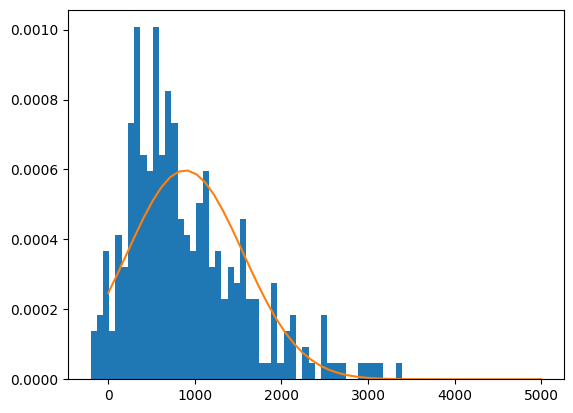

In [578]:
x = np.linspace(0, 5000)
y = norm.pdf(x, np.mean(df['oszczednosci']), np.std(df['oszczednosci']))
plt.hist(df['oszczednosci'], bins = 50, density = True)
plt.plot(x,y)
plt.show()

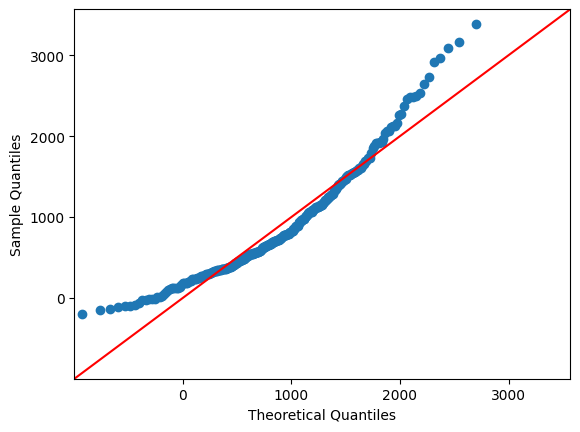

In [579]:
sm.qqplot(df['oszczednosci'], line = '45', loc = np.mean(df['oszczednosci']), scale = np.std(df['oszczednosci']));

In [580]:
sw_test_osz = shapiro(df['oszczednosci'])
print('p-value = ' + str(sw_test_osz.pvalue))

p-value = 7.383972600027988e-11


Jako, ≈ºe p-value wyra≈∫nie poni≈ºej poziomu istotno≈õci 0.01, odrzucamy rozk≈Çad normalny oszczƒôdno≈õci w spo≈Çecze≈Ñstwie Bajtocji.

# Zadanie 2

<Axes: >

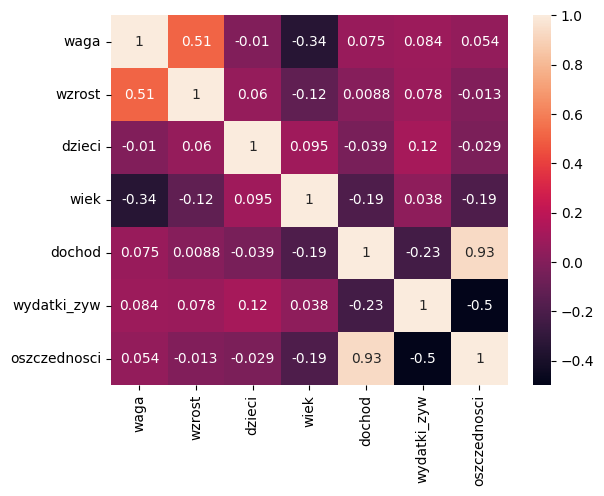

In [581]:
df_quantitative = df[['waga','wzrost' ,'dzieci','wiek', 'dochod' ,'wydatki_zyw', 'oszczednosci']]
sb.heatmap(df_quantitative.corr('spearman'), annot = True)

<Axes: >

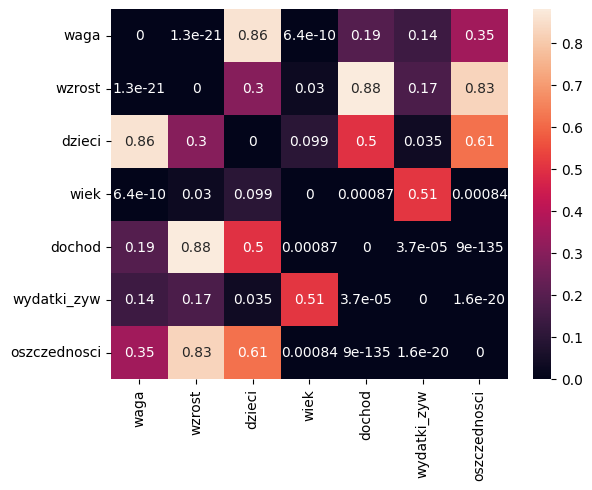

In [582]:
l = len(df_quantitative.columns)
p_values = [[0 for x in range(l)] for y in range(l)]

for i in range(l):
  for j in range(l):
    p_values[i][j] = spearmanr(df_quantitative.iloc[:, i], df_quantitative.iloc[:, j]).pvalue
p_val_df = pd.DataFrame(p_values, columns = df_quantitative.columns, index =df_quantitative.columns )
sb.heatmap(p_val_df, annot = True)

HipotezƒÖ zerowƒÖ jest brak korelacji dw√≥ch zmiennych.

Jako, ≈ºe czƒô≈õƒá zmiennych nie ma rozk≈Çadu normalnego, bezpieczniej bƒôdzie u≈ºyƒá korelacji Spearmana. U≈ºyjemy poziomu istotno≈õci Œ± = 0.05.

Powy≈ºej widoczne sƒÖ heatmapy wsp√≥≈Çczynnik√≥w korelacji Spearmana oraz odpowiadajƒÖce im p-value.

Najwyra≈∫niejsza dodatnia korelacja zachodzi przy zmiennych doch√≥d i oszczƒôdno≈õci. Przy wysokiej warto≈õci wsp√≥≈Çczynnika Spearmana (0.93) i p-value bardzo bliskim zera (9e-135)  odrzucamy hipotezƒô zerowƒÖ i uznajemy istnienie korelacji.

InnƒÖ  dodatniƒÖ korelacjƒÖ jest zwiƒÖzek miƒôdzy wzrostem a wagƒÖ. Te≈º taki wniosek wydaje siƒô logiczny, gdy≈º wy≈ºsze osoby czƒôsto majƒÖ wiƒôkszƒÖ masƒô kostnƒÖ i miƒô≈õniowƒÖ. Bardzo niskie p-value (1.3e-21) powoduje, ≈ºe uznajemy istnienie korelacji.

Mamy r√≥wnie≈º dodatniƒÖ korelacjƒô
miƒôdzy zmiennymi wydatki na ≈ºywno≈õƒá i liczba dzieci (p-value = 0.035). To p-value jest do≈õƒá blisko poziomu istotno≈õci, ale wciƒÖ≈º odrzucimy brak korelacji.

W≈õr√≥d ujemnych korelacji, mo≈ºemy zauwa≈ºyƒá wyra≈∫ny zwiƒÖzek miƒôdzy wydatkami na ≈ºywno≈õƒá a oszczƒôdno≈õciami (p-value =1.6e-20), miƒôdzy wiekiem a oszczƒôdno≈õciami (p-value = 0.00084), wiekiem a wagƒÖ (p-value = 6.4e-10),  dochodem a wydatkami na ≈ºywno≈õƒá(p-value =3.7e-5). Tutaj, warto≈õci p-value sƒÖ na tyle ma≈Çe, ≈ºe mo≈ºemy uznaƒá te korelacje za obecne w populacji Bajtocji.
Uznajemy te≈º korelacjƒô miƒôdzy wzrostem a wiekiem (p-value = 0.03), jednak ta warto≈õƒá jest  do≈õƒá blisko poziomu istotno≈õci.

Szczeg√≥lnie ciekawƒÖ jest  ujemna korelacja miƒôdzy dochodem a wydatkami na ≈ºywno≈õƒá - intuicja podpowiada≈Çaby inaczej, ≈ºe bardziej zamo≈ºni bƒôdƒÖ wydawaƒá na ≈ºywno≈õƒá wiƒôcej.

W reszcie par zmiennych nie mo≈ºemy odrzuciƒá braku korelacji zmiennych - p-value powy≈ºej poziomu istotno≈õci.

In [583]:
df_qualitative = df[['plec', 'miejsce', 'jednoos']]

a, b ,c ,d = chi2_contingency(pd.crosstab(df_qualitative['plec'], df_qualitative['miejsce']))
b
for i in df_qualitative.columns:
  for j in df_qualitative.columns:
    if i < j:
      chi2_val, p, dof, expected = chi2_contingency(pd.crosstab(df_qualitative[i], df_qualitative[j]))
      print('Zmienne: ' + i +", " + j)
      print('chi-squared: ' + str(chi2_val))
      print('p-value:' + str(p) + '\n')



Zmienne: miejsce, plec
chi-squared: 2.9973658607422933
p-value:0.22342423171950018

Zmienne: jednoos, plec
chi-squared: 0.13841187645610253
p-value:0.7098649541109077

Zmienne: jednoos, miejsce
chi-squared: 0.5238551616221235
p-value:0.7695667530897057



Bardzo du≈ºe warto≈õci p-value dla ka≈ºdej pary zmiennych jako≈õciowych wskazujƒÖ, ≈ºe nie mo≈ºemy odrzuciƒá niezale≈ºno≈õci tych zmiennych.

# Zadanie 3

In [584]:
kobiety = df[df['plec'] == 1]
mezczyzni = df[df['plec'] == 2]


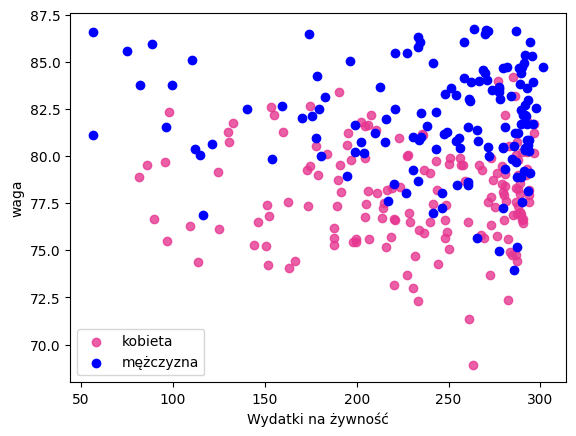

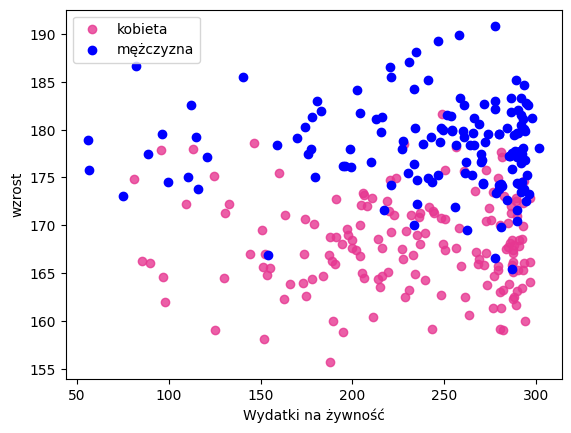

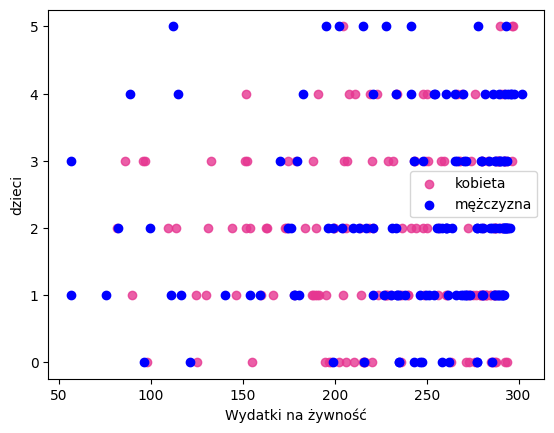

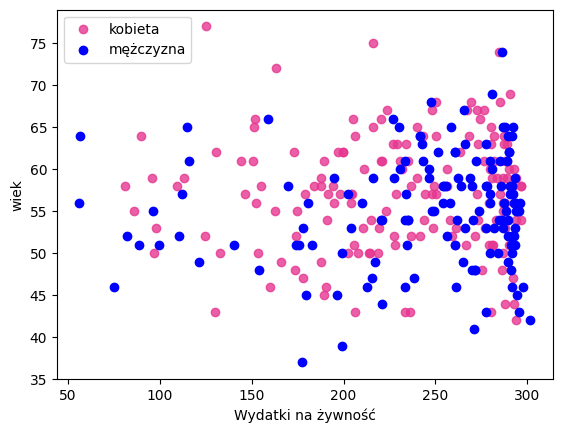

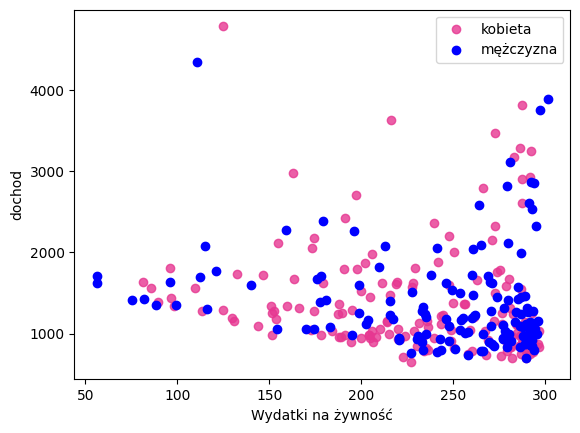

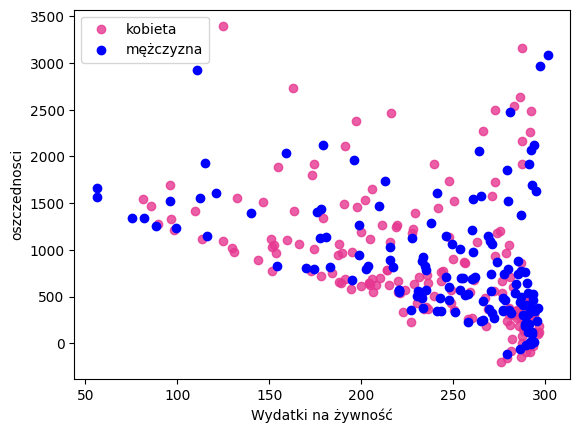

In [585]:

for i in df_quantitative.columns:
  if i != 'wydatki_zyw':
    plt.scatter(kobiety['wydatki_zyw'], kobiety[i], color = '#e63791cc')
    plt.scatter(mezczyzni['wydatki_zyw'], mezczyzni[i], color =  'blue')
    plt.xlabel('Wydatki na ≈ºywno≈õƒá')
    plt.ylabel(i)
    plt.legend(['kobieta','mƒô≈ºczyzna'])
    plt.show()

Z racji faktu, ≈ºe wzglƒôdnie du≈ºo os√≥b wydaje na ≈ºywno≈õƒá blisko maksymalnej warto≈õci takich wydatk√≥w w pr√≥bie, widzimy na ka≈ºdym wykresie wiƒôkszƒÖ obecno≈õƒá punkt√≥w z prawej strony.
W kontek≈õcie uzyskanych wcze≈õniej korelacji, waga, wzrost i wiek nie majƒÖ wyra≈∫nego zwiƒÖzku z wydatkami na ≈ºywno≈õƒá. Przy oszczƒôdno≈õciach i dochodzie widzimy, ≈ºe wydatki na ≈ºywno≈õƒá rzeczywi≈õcie spadajƒÖ przy ich wzro≈õcie - ujemna korelacja, przyjƒôta w poprzednim zadaniu, jest zauwa≈ºalna.

Dodatkowo rozr√≥≈ºni≈Çem kolorami kobiety i mƒô≈ºczyzn, w nadziei na rejestrowalne interesujƒÖce obserwacje, jednak takich nie widzƒô.

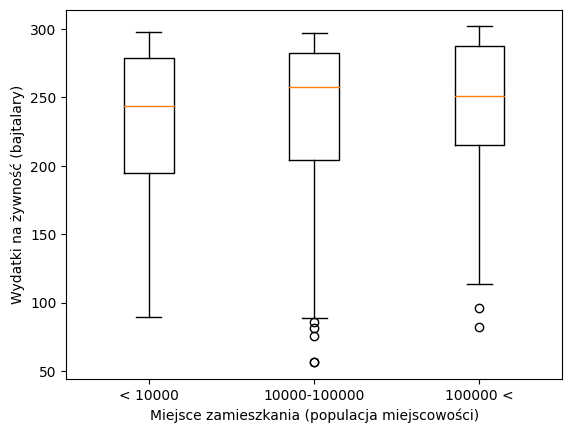

In [586]:
plt.boxplot([df[df['miejsce'] == 1]['wydatki_zyw'], df[df['miejsce'] == 2]['wydatki_zyw'],
           df[df['miejsce'] == 3]['wydatki_zyw']], labels = ['< 10000', '10000-100000', '100000 <'])
plt.xlabel('Miejsce zamieszkania (populacja miejscowo≈õci)')
plt.ylabel('Wydatki na ≈ºywno≈õƒá (bajtalary)')
plt.show()

Na powy≈ºszym wykresie pude≈Çkowym widzimy, ≈ºe w naszej pr√≥bie:
- najwy≈ºsza mediana wydatk√≥w jest w miejscowo≈õciach o populacji 10000-100000 mieszka≈Ñc√≥w
- zar√≥wno pierwszy, jak i trzeci kwartyl sƒÖ najni≈ºsze w miejscowo≈õciach o ludno≈õci do 10000, a najwy≈ºsze w miejscowo≈õciach o ponad 100000 mieszka≈Ñcach
- mediana jest najwy≈ºsza w miejscowo≈õciach od 10000 do 100000 mieszka≈Ñc√≥w

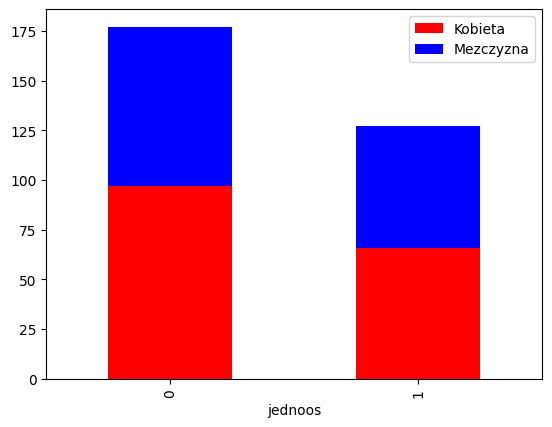

In [587]:

df_plot = df.groupby(['jednoos', 'plec']).size().reset_index().pivot(columns='plec', index='jednoos', values=0)
df_plot.plot(stacked = True, kind = 'bar', color = ['red', 'blue'] )
plt.legend(['Kobieta', 'Mezczyzna'])

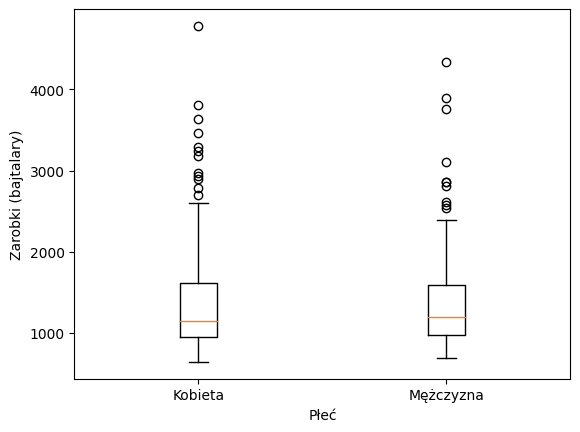

In [588]:
plt.boxplot([df[df['plec'] == 1]['dochod'], df[df['plec'] == 2]['dochod']],
            labels = ['Kobieta', 'Mƒô≈ºczyzna'])
plt.xlabel('P≈Çeƒá')
plt.ylabel('Zarobki (bajtalary)')
plt.show()

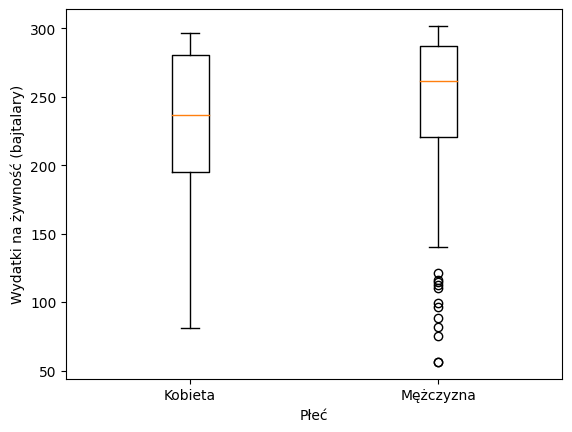

In [589]:
plt.boxplot([df[df['plec'] == 1]['wydatki_zyw'], df[df['plec'] == 2]['wydatki_zyw']],
            labels = ['Kobieta', 'Mƒô≈ºczyzna'])
plt.xlabel('P≈Çeƒá')
plt.ylabel('Wydatki na ≈ºywno≈õƒá (bajtalary)')
plt.show()

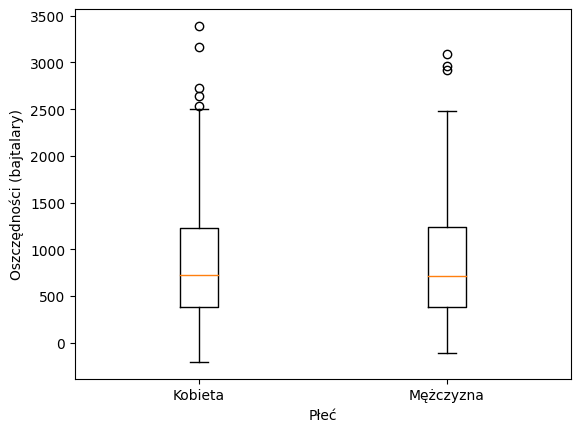

In [590]:
plt.boxplot([df[df['plec'] == 1]['oszczednosci'], df[df['plec'] == 2]['oszczednosci']],
            labels = ['Kobieta', 'Mƒô≈ºczyzna'])
plt.xlabel('P≈Çeƒá')
plt.ylabel('Oszczƒôdno≈õci (bajtalary)')
plt.show()

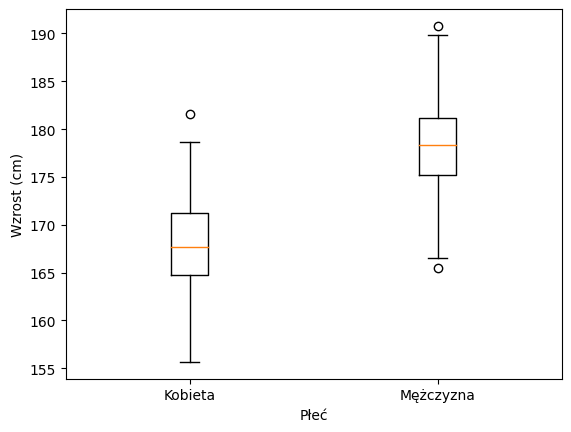

In [591]:
plt.boxplot([df[df['plec'] == 1]['wzrost'], df[df['plec'] == 2]['wzrost']],
            labels = ['Kobieta', 'Mƒô≈ºczyzna'])
plt.xlabel('P≈Çeƒá')
plt.ylabel('Wzrost (cm)')
plt.show()

Powy≈ºej jeszcze kilka wykres√≥w pude≈Çkowych wzglƒôdem p≈Çci. Widzimy, ≈ºe zarobki kobiet i mƒô≈ºczyzn w Bajtocji sƒÖ por√≥wnywalne, podobnie jak oszczƒôdno≈õci. Mƒô≈ºczy≈∫ni natomiast wydajƒÖ wyra≈∫nie wiƒôcej na jedzenie i sƒÖ na og√≥≈Ç wy≈ºsi (wykres pude≈Çkowy dla mƒô≈ºczyzn przypomina przesuniƒôty o jeden kwartyl w g√≥rƒô wykres pude≈Çkowy dla kobiet).

# Zadanie 4
Rozk≈Çad zmiennej wiek jest do≈õƒá bliski rozk≈Çadowi normalnemu (nie odrzucili≈õmy hipotezy o warto≈õci tego rozk≈Çadu). Centralne Twierdzenie Graniczne dodatkowo wspomaga nas w liczeniu przedzia≈Ç√≥w ufno≈õci, bo dla wzglƒôdnie du≈ºej pr√≥bki (304) nasz statystyka dla naszego t-testu bƒôdzie tym bardziej przypominaƒá rozk≈Çad normalny.

W√≥wczas, jako ≈ºe nie znamy odchylenia standardowego w populacji, u≈ºyjemy testu t-studenta dla jednej pr√≥bki do obliczenia przedzia≈Ç√≥w ufno≈õci dla ≈õredniej w populacji.

In [592]:
sample_mean = np.mean(df['wiek'])
unbiased_sample_std = np.std(df['wiek'], ddof = 1) # ddof = 1 so that std is unbiased
alpha = 0.01
N = len(df)
diff = tstud.ppf(df = N-1, q = 1-alpha/2) * unbiased_sample_std/np.sqrt(N)
left = sample_mean - diff
right = sample_mean + diff
print('Przedzia≈Ç ufno≈õci dla ≈õredniej w populacji na poziomie ufno≈õci 0.99: (' + str(left)
+ ', ' + str(right) + ')')




Przedzia≈Ç ufno≈õci dla ≈õredniej w populacji na poziomie ufno≈õci 0.99: (55.25152156054645, 57.26821528155881)


In [593]:
sample_mean

56.25986842105263

W przypadku odchylenia standardowego, u≈ºyjemy testu ùõò2. Tutaj za≈Ço≈ºenie o normalno≈õci rozk≈Çadu jest bardziej istotne. Mimo, i≈º nie ma pewno≈õci, czy zmienna ma rozk≈Çad normalny, to rozk≈Çad ten nie odbiega w du≈ºym stopniu od normalnego, nie odrzucili≈õmy te≈º mo≈ºliwo≈õci, ≈ºe zmienna ta ma rozk≈Çad normalny. U≈ºyjemy zatem tego testu.




In [594]:
sample_variance = np.var(df['wiek'], ddof=1)
left2 = n * sample_variance / chi2.ppf(df=N-1, q=1-alpha/2)
right2 = n * sample_variance / chi2.ppf(df=N-1, q=alpha/2)
print('Odchylenie standardowe: '  + str(np.sqrt(left)) + ' ' + str(np.sqrt(right)))

Odchylenie standardowe: 7.433136724192987 7.567576579167126


In [595]:
delta1 = -np.sqrt(N) *  norm.ppf(0.25)
delta2 =- np.sqrt(N) *  norm.ppf(0.5)
delta3 = -np.sqrt(N) *  norm.ppf(0.75)
print(delta1, delta2, delta3)

11.760130638234855 -0.0 -11.760130638234855


Dla kwartyli, skorzystamy z metody zawartej w ksiƒÖ≈ºce *Lawless, Jerald F. 2003, "Statistical Models and Methods for Lifetime Data".* Aby u≈ºyƒá tej metody, r√≥wnie≈º potrzebujemy za≈Ço≈ºenia o normalnym rozk≈Çadzie zmiennej. Ponownie, jak w przyk≈Çadzie z odchylebniem standardowym, u≈ºywamy takiego za≈Ço≈ºenia biorƒÖc poprawkƒô na to, ≈ºe nie mamy ca≈Çkowitej pewno≈õci na ten temat i przez to wyniki mogƒÖ zostaƒá zaburzone. Wierzymy jednak, ≈ºe to zaburzenie nie bƒôdzie zanadto du≈ºe.


In [596]:
left1 = sample_mean - nct.ppf(q = 1- alpha/2, df = N - 1, nc = delta1) * unbiased_sample_std /np.sqrt(N)
right1 = sample_mean - nct.ppf(q = alpha/2, df = N - 1, nc = delta1) * unbiased_sample_std /np.sqrt(N)
left3 = sample_mean - nct.ppf(q = 1 - alpha/2, df = N - 1, nc = delta3) * unbiased_sample_std /np.sqrt(N)
right3 = sample_mean - nct.ppf(q = alpha/2, df = N - 1, nc = delta3) * unbiased_sample_std /np.sqrt(N)
print('Pierwszy kwartyl: (' +  str(left1) + ' ' + str(right1)+  ')')

Pierwszy kwartyl: (50.51442582338502 52.75005619264797)


In [597]:
left2 = sample_mean - nct.ppf(q = 1- alpha/2, df = N - 1, nc = delta2) * unbiased_sample_std /np.sqrt(N)
right2 = sample_mean - nct.ppf(q = alpha/2, df = N - 1, nc = delta2) * unbiased_sample_std /np.sqrt(N)
print('Drugi kwartyl: (' +  str(left2) + ' ' + str(right2)+  ')')

Drugi kwartyl: (55.25152156054516 57.2682152815601)


In [598]:
left3 = sample_mean - nct.ppf(q = 1 - alpha/2, df = N - 1, nc = delta3) * unbiased_sample_std /np.sqrt(N)
right3 = sample_mean - nct.ppf(q = alpha/2, df = N - 1, nc = delta3) * unbiased_sample_std /np.sqrt(N)
print('Trzeci kwartyl: (' +  str(left3) + ' ' + str(right3)+  ')')

Trzeci kwartyl: (59.76968064945729 62.00531101872024)


# Zadanie 5

Jako, ≈ºe pr√≥bka jest spora i reprezentatywna, dzielimy jƒÖ na klasy ekonomiczne na podstawie kwantyli.

In [599]:
prog_1 = df['dochod'].quantile(0.25)
prog_2 = df['dochod'].quantile(0.75)
prog_3 = df['dochod'].quantile(0.9)
print(prog_1, prog_2, prog_3)

965.83 1613.9475 2194.527


In [600]:
klasa_nizsza = df[df['dochod'] <= prog_1]
klasa_srednia = df[df['dochod'] > prog_1][df['dochod'] <= prog_2]
klasa_srednia_wyzsza = df[df['dochod'] > prog_2][df['dochod'] <= prog_3]
klasa_wyzsza = df[df['dochod'] >= prog_3]

<ipython-input-600-6898310aadbc>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-600-6898310aadbc>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Aby przeanalizowaƒá miary zr√≥≈ºnicowania, obliczymy indeks Giniego dla populacji. Jest to miara zr√≥≈ºnicowania szczeg√≥lnie dobrze sprawdzajƒÖca siƒô w nier√≥wno≈õciach dochodowych.

In [601]:
def gini(df):
    x = np.array(df)
    mad = np.abs(np.subtract.outer(x,x)).mean() # mean absolute difference
    rmad = mad/np.mean(x) # relative mean absolute difference
    gini_co = 0.5 * rmad
    return gini_co

In [602]:
print('Warto≈õci wsp√≥≈Çczynnika Giniego:')
print('Klasa ni≈ºsza:', gini(np.array(klasa_nizsza['wydatki_zyw'])))
print('Klasa ≈õrednia:',gini(np.array(klasa_srednia['wydatki_zyw'])))
print('Klasa ≈õrednia wy≈ºsza:',gini(np.array(klasa_srednia_wyzsza['wydatki_zyw'])))
print('Klasa wy≈ºsza:',gini(np.array(klasa_wyzsza['wydatki_zyw'])))
print('Ca≈Ça pr√≥ba:',gini(np.array(df['wydatki_zyw'])))

Warto≈õci wsp√≥≈Çczynnika Giniego:
Klasa ni≈ºsza: 0.06748590905309047
Klasa ≈õrednia: 0.14009074323670181
Klasa ≈õrednia wy≈ºsza: 0.1815694718482499
Klasa wy≈ºsza: 0.11428533828001357
Ca≈Ça pr√≥ba: 0.13074805906361678


Widzimy, ≈ºe najwiƒôksze zr√≥≈ºnicowanie wydatk√≥w na ≈ºywno≈õƒá ma miejsce w klasie ≈õredniej wy≈ºszej, a najmniejsze w klasie ni≈ºszej. Byƒá mo≈ºe osoby z klasy ni≈ºszej wydajƒÖ mniej, aby m√≥c wiƒôcej oszczƒôdziƒá, w por√≥wnaniu do os√≥b z wy≈ºszych klas, kt√≥re mogƒÖ sobie pozwoliƒá na dro≈ºsze produkty.

# Zadanie 6
W pierwszym punkcie, stawiamy hipotezƒô zerowƒÖ:
H_0 - kobiety nie cechujƒÖ siƒô wy≈ºszymi warto≈õciami oszczƒôdno≈õci ni≈º mƒô≈ºczyzni.
Do sprawdzenia prawdziwo≈õci tej hipotezy u≈ºyjemy testu U Manna-Whitneya. Najpierw sprawdzimy, czy wariancje sƒÖ wystarczajƒÖco podobne w obu grupach.

In [603]:
oszczednosci_kobiet = df[df['plec'] == 1]['oszczednosci']
np.var(oszczednosci_kobiet) # kobiety

481476.8002419888

In [604]:
oszczednosci_mezczyzn = df[df['plec'] == 2]['oszczednosci']
np.var(oszczednosci_mezczyzn) # mƒô≈ºczy≈∫ni

403906.3103780091

Wariancje r√≥≈ºniƒÖ siƒô, ale nie a≈º tak drastycznie, aby test Manna-Whitneya by≈Çby do odrzucenia.

In [605]:
result = mannwhitneyu(oszczednosci_kobiet, oszczednosci_mezczyzn, use_continuity = False, alternative = 'greater')
print(result.statistic)
print(result.pvalue)

11708.0
0.3884862703250642


In [606]:
result = mannwhitneyu( oszczednosci_mezczyzn, oszczednosci_kobiet, use_continuity = False)
result.pvalue

0.7769725406501284

PatrzƒÖc na test U przy innej hipotezie zerowej, mianowicie r√≥wno≈õci rozk≈Çad√≥w zmiennych, widzimy, ≈ºe bardzo ciƒô≈ºko jest jƒÖ odrzuciƒá - p-value jest bardzo wysokie. Dlatego te≈º, biorƒÖc pod uwagƒô powy≈ºsze wnioski, stwierdzam, ≈ºe nie mo≈ºna stwierdziƒá na podstawie danych, czy kobiety oszczƒôdzajƒÖ wiƒôcej od mƒô≈ºczyzn, a nawet je≈õli, to ta r√≥≈ºnica nie jest istotna statystycznie.

Zgodnie z poziomem istotno≈õci Œ± = 0.01, nie mo≈ºemy odrzuciƒá hipotezy zerowej o tym, ≈ºe kobiety nie oszczƒôdzajƒÖ wiƒôcej od mƒô≈ºczyzn. PatrzƒÖc na wykres poni≈ºej, rzeczywi≈õcie nie wydaje siƒô, by kt√≥ra≈õ p≈Çeƒá mia≈Çaby przewa≈ºaƒá w oszczƒôdno≈õciach.

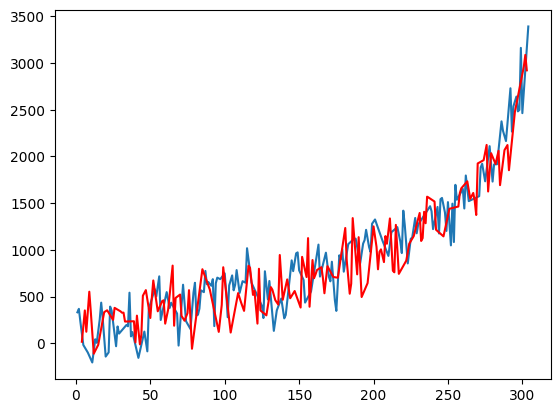

In [607]:
plt.plot(oszczednosci_kobiet)
plt.plot(oszczednosci_mezczyzn, color = 'r')
plt.show()

Teraz zajmƒô siƒô punktem drugim, czyli sprawdzeniem korelacji proporcji wydatk√≥w na ≈ºywno≈õƒá wzglƒôdem dochodu wobec oszczƒôdno≈õci. Ponownie wykorzystam test korelacji Spearmana, bo ma mniej ogranicze≈Ñ ni≈º test korelacji Pearsona (brak za≈Ço≈ºenia o rozk≈Çadzie normalnym).

In [608]:
proporcje_wydatkow_na_zywnosc = df['wydatki_zyw'] / df['dochod']
oszczednosci = df['oszczednosci']

In [609]:
spearmanr(proporcje_wydatkow_na_zywnosc, oszczednosci)

SignificanceResult(statistic=-0.9726091116445553, pvalue=2.0103756749114015e-193)

In [610]:
px.scatter(x = proporcje_wydatkow_na_zywnosc, y = oszczednosci)

Jak widzimy, p-value testu jest bardzo ma≈Çe, warto≈õƒá testu ujemna, a na wykresie mo≈ºemy zauwa≈ºyƒá, ≈ºe rzeczywi≈õcie ta korelacja ujemna wydaje siƒô mieƒá miejsce. Zatem z niemal 100% pewno≈õciƒÖ mo≈ºemy powiedzieƒá, ≈ºe ta korelacja wystƒôpuje w populacji.

Co do punktu trzeciego, mo≈ºemy po prostu wyliczyƒá ≈õredniƒÖ wagƒô kobiet w pr√≥bie:


In [611]:
waga_kobiet = df[df['plec']== 1]['waga']
print(waga_kobiet.mean())

78.01662576687119


Jednak zak≈ÇadajƒÖc pomy≈Çkƒô w tre≈õci, sprawdzimy to samo dla populacji kobiet w Bajtocji.

H-0 - waga kobiet w populacji jest mniejsza/r√≥wna 56 kg.

H-1 waga kobiet w populacji jest wiƒôksza ni≈º 56 kg.

Jako, ≈ºe waga ma najprawdopodobniej rozk≈Çad normalny, mo≈ºemy dobrze wyliczyƒá przedzia≈Çy ufno≈õci.

In [612]:
mean_0 = 56
N = len(waga_kobiet)
T = ((waga_kobiet.mean() - mean_0) / np.std(waga_kobiet)) * np.sqrt(N)
p_value = 1 - tstud.cdf(T, N-1)

p-value jest tutaj tak niesamowicie ma≈Çe, ≈ºe nawet Python uznaje je za 0. W takim wypadku odrzucamy hipotezƒô zerowƒÖ i uznajemy, ≈ºe ≈õrednia waga kobiet w populacji jest wiƒôksza od 56 kg.

NaszƒÖ dodatkowƒÖ hipotezƒÖ bƒôdzie, ≈ºe doch√≥d w populacji Bajtocji ma rozk≈Çad wyk≈Çadniczy o warto≈õci Œª = 1.01.

(645.27, 744.0457236842103)
Statystyka testowa: 0.12994942096520892
Warto≈õƒá p: 6.174954278042687e-05


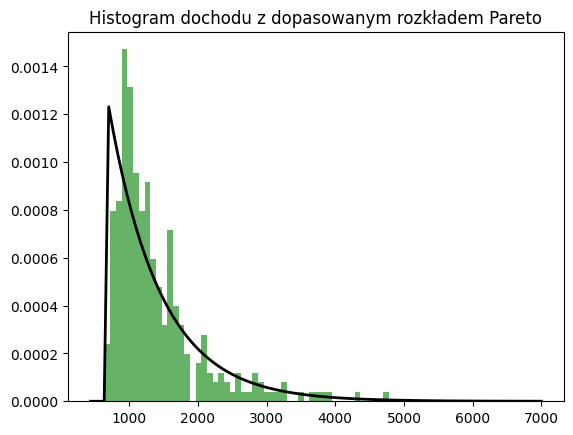

In [613]:
import numpy as np
from scipy.stats import expon
from scipy.stats import kstest
import matplotlib.pyplot as plt


dochod = np.array(df['dochod'])

parametry =expon.fit(dochod)
p0 = parametry[0]
p1 = parametry[1]


p1 *= 1.01
par2 = [p0, p1]

print(parametry)

statystyka, p_value = kstest(dochod, 'expon', args=par2)

print("Statystyka testowa:", statystyka)
print("Warto≈õƒá p:", p_value)

plt.hist(dochod, bins=50, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()

x = np.linspace(xmin, 7000, 100)
pdf = expon.pdf(x, *par2)
plt.plot(x, pdf, 'k-', linewidth=2)
plt.title("Histogram dochodu z dopasowanym rozk≈Çadem Pareto")
plt.show()

Niestety, nasze p-value r√≥wne ok. 0.0035 jest mniejsze od poziomu istotno≈õci 0.01, a zatem odrzucamy tƒô hipotezƒô.

# Zadanie 7


In [614]:
dependent_var = df['wydatki_zyw']
predictors = df.drop(columns=['wydatki_zyw'])
predictors = pd.get_dummies(predictors, columns = ['plec'], prefix = 'plec', drop_first = True, dtype = int)
predictors = pd.get_dummies(predictors, columns = ['jednoos'], prefix = 'jednoos', drop_first = True, dtype = int)
predictors = pd.get_dummies(predictors, columns = ['miejsce'], prefix = 'miejsce', drop_first = True, dtype = int)
predictors = sm.add_constant(predictors)
predictors

const   waga  wzrost  dzieci  wiek   dochod  oszczednosci  plec_2  \
id                                                                       
1      1.0  80.96  171.07       4    55   708.72        332.61       0   
2      1.0  79.25  171.25       2    58   804.21        369.51       0   
3      1.0  73.69  167.48       1    63   645.27        232.55       0   
4      1.0  80.84  179.87       2    56   793.26         17.62       1   
5      1.0  76.92  171.01       3    64   703.44        -17.29       0   
..     ...    ...     ...     ...   ...      ...           ...     ...   
300    1.0  78.18  167.66       0    65  3632.65       2463.14       0   
301    1.0  82.57  181.19       4    46  3751.99       2961.96       1   
302    1.0  84.74  178.04       4    42  3893.04       3086.41       1   
303    1.0  85.08  175.06       1    52  4339.20       2921.25       1   
304    1.0  79.18  175.14       1    52  4780.15       3390.59       0   

     jednoos_1  miejsce_2  miejsce_3  
id                                    
1            0          0          1  
2            0          1          0  
3            0          0          0  
4            0          0          1  
5            0          0          0  
..         ...        ...        ...  
300          1          1          0  
301          1          0          0  
302          1          0          1  
303          1          1          0  
304          1          1          0  

[304 rows x 11 columns]

In [615]:
model = sm.OLS(dependent_var, predictors)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     61.90
Date:                Sun, 12 May 2024   Prob (F-statistic):           2.51e-66
Time:                        20:41:42   Log-Likelihood:                -1488.6
No. Observations:                 304   AIC:                             2999.
Df Residuals:                     293   BIC:                             3040.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          226.2224     90.953      2.487   

In [616]:
dependent_var

id
1      222.89
2      236.60
3      227.18
4      293.88
5      289.55
        ...  
300    216.29
301    297.58
302    301.69
303    110.60
304    124.69
Name: wydatki_zyw, Length: 304, dtype: float64

Wsp√≥≈Çczynnik R^2, m√≥wiƒÖcy o tym, jaka czƒô≈õƒá wariancji jest t≈Çumaczona regresjƒÖ liniowƒÖ, wynosi 0.679. Wynik wydaje siƒô do≈õƒá solidny, chocia≈º warto spr√≥bowaƒá go poprawiƒá. Wynik testu F ≈ÇƒÖcznej istotno≈õci m√≥wi o tym, ≈ºe mo≈ºemy odrzuciƒá hipotezƒô zerowƒÖ m√≥wiƒÖcƒÖ o tym, ≈ºe wyzerowanie wszystkich predyktor√≥w da≈Çoby nam lepszƒÖ predykcjƒô - regresja liniowa jest w tym wypadku dobrym rozwiƒÖzaniem- p-value jest niesamowicie ma≈Çe, a wynik testu jest o wiele wiƒôkszy od 1.

Co do poszczeg√≥lnych predyktor√≥w, biorƒÖc poziom istotno≈õci Œ± = 0.01, widzimy, ≈ºe sporo z nich prawdopodobnie nie ma wp≈Çywu na regresjƒô liniowƒÖ, jak choƒáby miejsce_3 czy wzrost. Z pewno≈õciƒÖ wp≈Çyw majƒÖ oszczƒôdno≈õci i doch√≥d.



In [617]:
predictions = results.get_prediction()
predictions_summary = predictions.summary_frame()


In [618]:
residuals = dependent_var.sub(predictions_summary['mean'])
residuals = residuals.to_frame('res')


In [619]:
mean_res = residuals.mean()
std_res = residuals.std()
st_res = (residuals - mean_res)/ std_res
st_res = np.sqrt(abs(st_res))


1. Wyra≈∫nie widzimy, ≈ºe residuals nie uk≈ÇadajƒÖ siƒô r√≥wnomiernie wzd≈Çu≈º osi OY, lecz wydajƒÖ siƒô przypominaƒá funkcjƒô kwadratowƒÖ od warto≈õci predykcji o ujemnym wsp√≥≈Çczynniku. Nie spe≈Çnia to za≈Ço≈ºenia KMRL o liniowo≈õci formy funkcyjnej.

In [620]:
aux = residuals.join(predictions_summary['mean'])
fig = px.scatter(aux, 'mean', 'res')
fig.add_scatter(x=[100,320], y = [0,0], showlegend=False)

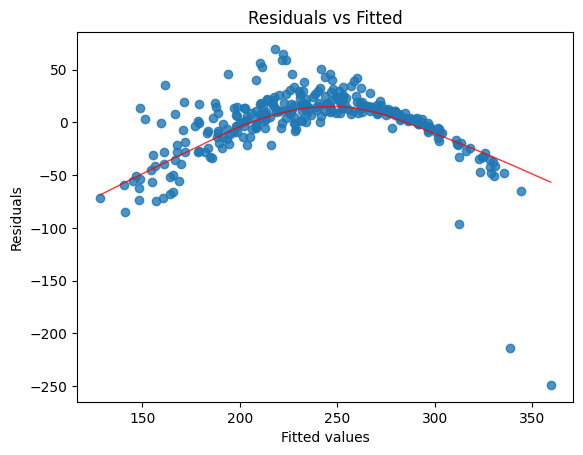

In [621]:
from statsmodels.graphics.gofplots import ProbPlot
import seaborn as sns
import matplotlib.pyplot as plt
model_fitted_y = results.fittedvalues
model_residuals = results.resid
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.regplot(x=model_fitted_y, y=model_residuals,
                                scatter=True,
                                ci=False,
                                lowess=True,
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

2. Widzimy, ≈ºe na wykresie ustantadyzowanych reszt wobec dopasowanych warto≈õci, reszty te nie uk≈ÇadajƒÖ siƒô wzd≈Çu≈º poziomej prostej. Tr√≥jkƒÖtne kszta≈Çty na wykresie wskazujƒÖ na heteoskadystyczno≈õƒá sk≈Çadnika losowego.

In [622]:
aux = st_res.join(predictions_summary['mean'])
px.scatter(aux, 'mean', 'res')


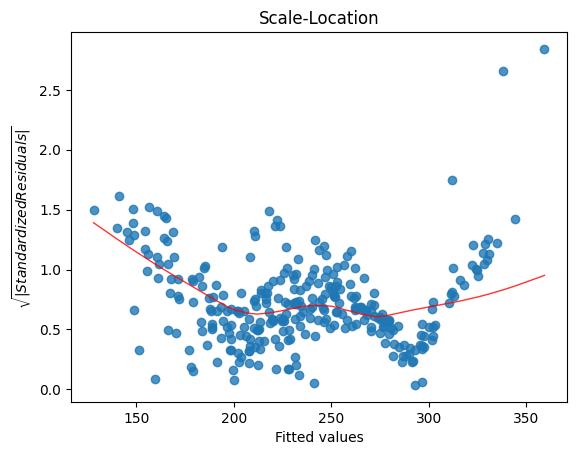

In [623]:
from statsmodels.graphics.gofplots import ProbPlot
import seaborn as sns
import matplotlib.pyplot as plt

model_fitted_y = results.fittedvalues
model_residuals = results.resid
model_norm_residuals = results.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_2 = plt.figure()
sns.regplot(x=model_fitted_y, y=model_norm_residuals_abs_sqrt,
            scatter=True,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_2.axes[0].set_title('Scale-Location')
plot_lm_2.axes[0].set_xlabel('Fitted values')
plot_lm_2.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

3. Na wykresie kolejnych warto≈õci sk≈Çadnik√≥w losowych zauwa≈ºamy trend - pod warto≈õci zaczynajƒÖ rosnƒÖƒá wraz ze wzrostem id. To pozwala nam powiedzieƒá, ≈ºe dane te cierpiƒÖ na autokorelacjƒô sk≈Çadnika losowego.

In [624]:
px.scatter(residuals)

4. Na koniec sprawdzimy rozk≈Çad warto≈õci sk≈Çadnika losowego - chcemy, aby ten by≈Ç normalny. U≈ºyjemy wykresu kwantyl-kwantyl. Widzimy, ≈ºe absoultnie nie przypomina to rozk≈Çadu normalnego. Zatem wszystkie za≈Ço≈ºenia KMRL sƒÖ niespe≈Çnione.

In [625]:
np.std(residuals)

res    32.386163
dtype: float64

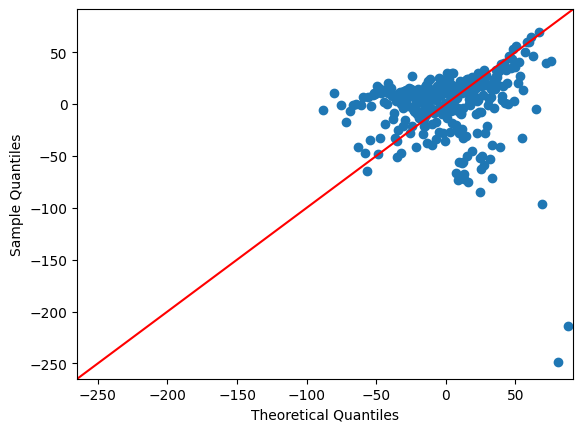

In [626]:
sm.qqplot(residuals, line = '45', loc = np.mean(residuals), scale = np.std(residuals));

Sprawdzimy teraz, czy wystƒôpuje problem niedok≈Çadnej wsp√≥≈Çliniowo≈õci.

In [627]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = predictors.columns

#calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(predictors.values, i)
                          for i in range(len(predictors.columns))]

print(vif_data)

         feature          VIF
0          const  2310.884983
1           waga     1.731495
2         wzrost     2.248774
3         dzieci     1.028401
4           wiek     1.203732
5         dochod     9.216374
6   oszczednosci    11.222733
7         plec_2     2.625501
8      jednoos_1     2.422016
9      miejsce_2     1.500755
10     miejsce_3     1.499050


Widzimy, ≈ºe nasz problem niedok≈Çadnej wsp√≥≈Çliniowo≈õci wystƒôpuje dla sta≈Çej, oraz zmiennych oszczƒôdno≈õci i doch√≥d (przyjƒÖ≈Çem pr√≥g 5 dla warto≈õci VIF).

Zajmiemy siƒô teraz usuniƒôciem outlier√≥w. Widzieli≈õmy, ≈ºe niekt√≥re obserwacje wydajƒÖ siƒô byƒá podejrzane:

In [628]:
aux = residuals.join(predictions_summary['mean'])
fig = px.scatter(aux, 'mean', 'res')
fig.add_scatter(x=[100,320], y = [0,0], showlegend=False)

Widzimy, ≈ºe chocia≈ºby dwie ostatnie obserwacje charakteryzujƒÖ siƒô wyjƒÖtkowo du≈ºƒÖ r√≥≈ºnicƒÖ predykcji od w≈Çasnej warto≈õci. Sprawd≈∫my, kt√≥re obserwacje majƒÖ najwiƒôkszƒÖ d≈∫wigniƒô:

In [630]:
leverage = results.get_influence().hat_matrix_diag
leverage

array([0.03277973, 0.01620458, 0.02807457, 0.02393589, 0.03084615,
       0.03721511, 0.01846006, 0.04390626, 0.03643671, 0.0354023 ,
       0.04917104, 0.04845309, 0.0351242 , 0.03292386, 0.0358015 ,
       0.02229697, 0.03075296, 0.03298754, 0.02419198, 0.03874667,
       0.06152106, 0.03792393, 0.029511  , 0.03514092, 0.02264503,
       0.0231613 , 0.03914869, 0.0217367 , 0.03173369, 0.05334836,
       0.03283929, 0.02788895, 0.03574777, 0.02518349, 0.04278634,
       0.01624659, 0.03391456, 0.05229505, 0.03550439, 0.0443735 ,
       0.03373948, 0.04068621, 0.03090014, 0.04303162, 0.02777323,
       0.03891558, 0.02450275, 0.0498669 , 0.02930086, 0.02490594,
       0.01980827, 0.04353042, 0.02746363, 0.02816222, 0.05589246,
       0.03061476, 0.02207081, 0.02423621, 0.02263865, 0.03345257,
       0.02317305, 0.03923058, 0.04151475, 0.01736669, 0.05488453,
       0.01954682, 0.02702102, 0.04060866, 0.03539777, 0.04841077,
       0.015049  , 0.0388791 , 0.02570219, 0.02099979, 0.02586

In [658]:
leverage_mean = len(predictors.columns)/len(df)
lev = []
for i in range(len(leverage)):
  if leverage[i] > 2 * leverage_mean:
    lev.append(i + 1)

In [659]:
lev

[206, 254, 299, 300, 301, 302, 303, 304]

Widzimy, ≈ºe nasze odstajƒÖce obserwacje wykazujƒÖ siƒô du≈ºƒÖ d≈∫wigniƒÖ. Pozbƒôdziemy siƒô ich w nadziei, ≈ºe pomo≈ºe to naszemu modelowi.

In [638]:
cleaned_df = df.drop(lev)


In [639]:
cleaned_df

waga  wzrost  plec  dzieci  wiek   dochod  oszczednosci  jednoos  \
id                                                                       
1    80.96  171.07     1       4    55   708.72        332.61        0   
2    79.25  171.25     1       2    58   804.21        369.51        0   
3    73.69  167.48     1       1    63   645.27        232.55        0   
4    80.84  179.87     2       2    56   793.26         17.62        0   
5    76.92  171.01     1       3    64   703.44        -17.29        0   
..     ...     ...   ...     ...   ...      ...           ...      ...   
294  74.92  167.55     1       3    59  3173.45       2535.91        1   
295  81.57  169.84     2       1    60  3110.79       2478.51        1   
296  78.32  172.04     1       2    50  3289.24       2640.79        1   
297  81.85  169.95     1       3    56  3243.21       2482.30        1   
298  76.35  170.42     1       0    57  3467.62       2497.21        1   

     miejsce  wydatki_zyw  
id                         
1          3       222.89  
2          2       236.60  
3          1       227.18  
4          3       293.88  
5          1       289.55  
..       ...          ...  
294        2       283.44  
295        2       280.93  
296        2       286.58  
297        2       292.73  
298        2       272.89  

[296 rows x 10 columns]

In [678]:
predictors = predictors.drop(lev)

In [685]:
dependent_var = dependent_var.drop(lev)

Postaramy siƒô teraz poprawiƒá nasz model.

In [732]:
model = sm.OLS(dependent_var, predictors)
results =model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     159.8
Date:                Sun, 12 May 2024   Prob (F-statistic):          1.31e-110
Time:                        21:28:38   Log-Likelihood:                -1333.9
No. Observations:                 296   AIC:                             2690.
Df Residuals:                     285   BIC:                             2730.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          104.6480     63.122      1.658   

BiorƒÖc nasz poziom istotno≈õci 0.01, spr√≥bujƒô usunƒÖƒá zmienne o p-warto≈õci wiƒôkszej od niego.

In [706]:
new_predictors = predictors[['oszczednosci', 'dochod']]
new_predictors

oszczednosci   dochod
id                        
1          332.61   708.72
2          369.51   804.21
3          232.55   645.27
4           17.62   793.26
5          -17.29   703.44
..            ...      ...
294       2535.91  3173.45
295       2478.51  3110.79
296       2640.79  3289.24
297       2482.30  3243.21
298       2497.21  3467.62

[296 rows x 2 columns]

In [692]:
dependent_var

id
1      222.89
2      236.60
3      227.18
4      293.88
5      289.55
        ...  
294    283.44
295    280.93
296    286.58
297    292.73
298    272.89
Name: wydatki_zyw, Length: 296, dtype: float64

In [695]:
model = sm.OLS(dependent_var, new_predictors)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            wydatki_zyw   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              5517.
Date:                Sun, 12 May 2024   Prob (F-statistic):                   7.67e-234
Time:                        21:04:29   Log-Likelihood:                         -1505.2
No. Observations:                 296   AIC:                                      3014.
Df Residuals:                     294   BIC:                                      3022.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
oszczednosci    -0.3549      0.008    -45.376      0.000      -0.370      -0.339
dochod           0.3946      0.006     70.181      0.000       0.384       0.406
==============================================================================
Omnibus:                      116.912   Durbin-Watson:                   1.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.121
Skew:                          -1.695   Prob(JB):                     5.39e-95
Kurtosis:                       7.869   Cond. No.                         7.37
==============================================================================

Notes:
[1] R¬≤ is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Widzimy znacznƒÖ poprawƒô wsp√≥≈Çczynnika R^2! To znaczy, ≈ºe nasz nowy model lepiej oddaje zale≈ºno≈õci miƒôdzy zmiennymi. Jednak pozostaje problem, czy spe≈Çniamy za≈Ço≈ºenia KMRL.

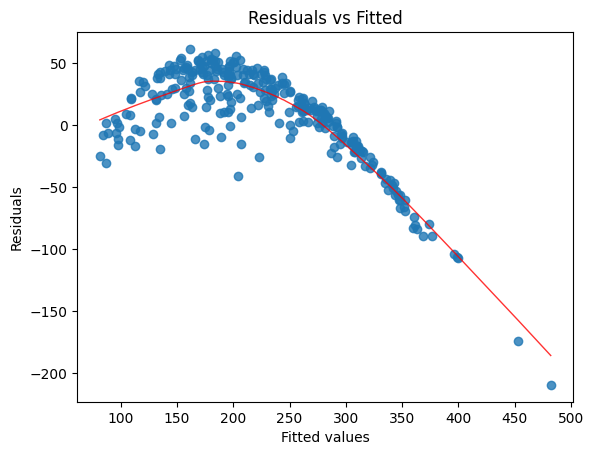

In [696]:
model_fitted_y = results.fittedvalues
# model residuals
model_residuals = results.resid

# here we use matplotlib
# with sns.residplot
# we draw the scatterplot of residuals against the fitted values (scatter=True)
# and we add a regression line
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.regplot(x=model_fitted_y, y=model_residuals,
                                scatter=True,
                                ci=False,
                                lowess=True,
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

Widzimy wciƒÖ≈º, ≈ºe pomimo poprawienia R^2, nie mamy liniowej zale≈ºno≈õci formy funkcyjnej. Widzimy wciƒÖ≈º, ≈ºe przypomina to kwadratowƒÖ zale≈ºno≈õƒá - dlatego te≈º spr√≥bujemy co≈õ podnie≈õƒá do kwadratu w formie funkcyjnej.

Spr√≥bujmy przeanalizowaƒá naszƒÖ zmiennƒÖ: wiemy, ≈ºe zale≈ºy ona przede wszystkim od dochod√≥w i oszczƒôdno≈õci. Mo≈ºe zatem odejmijmy od dochod√≥w oszczƒôdno≈õci - przecie≈º wydatki na ≈ºywno≈õƒá to czƒô≈õƒá dochodu, kt√≥rej nie przeznacza siƒô na oszczƒôdno≈õci!

In [707]:
x = new_predictors['dochod'] - new_predictors['oszczednosci']

In [709]:
y = [i*i for i in x]

In [858]:
new_predictors = pd.DataFrame()
new_predictors['diff'] = x
new_predictors['diff^2'] = y
new_predictors['wiek'] = predictors['wiek']
new_predictors['dzieci'] = predictors['dzieci']
new_predictors['plec_2'] = predictors['plec_2']


In [859]:
new_predictors = sm.add_constant(new_predictors)

In [860]:
model = sm.OLS(dependent_var, new_predictors)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.676e+04
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        22:04:38   Log-Likelihood:                -515.23
No. Observations:                 296   AIC:                             1042.
Df Residuals:                     290   BIC:                             1065.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.6054      0.787     42.690      0.0

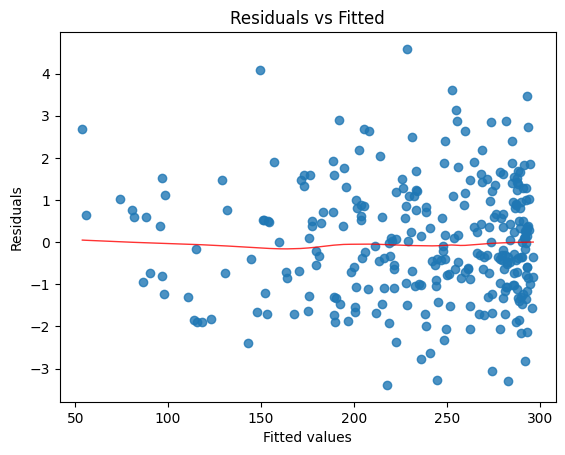

In [861]:
model_fitted_y = results.fittedvalues
# model residuals
model_residuals = results.resid

# here we use matplotlib
# with sns.residplot
# we draw the scatterplot of residuals against the fitted values (scatter=True)
# and we add a regression line
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.regplot(x=model_fitted_y, y=model_residuals,
                                scatter=True,
                                ci=False,
                                lowess=True,
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

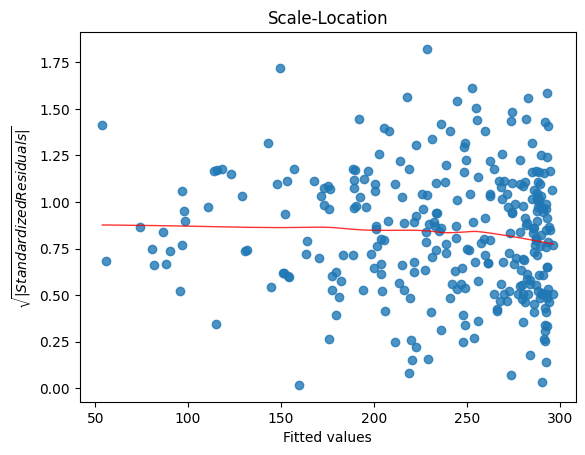

In [862]:
from statsmodels.graphics.gofplots import ProbPlot
import seaborn as sns
import matplotlib.pyplot as plt

model_fitted_y = results.fittedvalues
model_residuals = results.resid
model_norm_residuals = results.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_2 = plt.figure()
sns.regplot(x=model_fitted_y, y=model_norm_residuals_abs_sqrt,
            scatter=True,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_2.axes[0].set_title('Scale-Location')
plot_lm_2.axes[0].set_xlabel('Fitted values')
plot_lm_2.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

Jak widzimy, biorƒÖc tranformacjƒô zmiennych dochod-oszczednosci, oraz stosujƒÖc regresjƒô liniowƒÖ dla predyktor√≥w: const, dochod-oszczednosci, (dochod-oszczednosci)^2 oraz jednoos_1, dzieci, dostajemy model regresji, w kt√≥rym niemal ca≈Ça wariancja t≈Çumaczona jest przez regresjƒô. Dodatkowo pozbyli≈õmy siƒô nieliniowo≈õci formy funkcyjnej oraz heteroskadystyczno≈õci sk≈Çadnika losowego - na pierwszym wykresie mamy niemal poziomƒÖ liniƒô na wysoko≈õci 0, a wok√≥≈Ç niej r√≥wnomierne porozrzucane warto≈õci co ≈õwiadczy o liniowo≈õci formy, a na drugim podobnie, tylko nie na wysoko≈õci zera, co ≈õwiadczy o homoskadystyczno≈õci naszego sk≈Çadnika losowego. Sprawdzimy jeszcze autokorelacjƒô sk≈Çadnika losowego oraz jego rozk≈Çad.

In [863]:
px.scatter(results.resid)

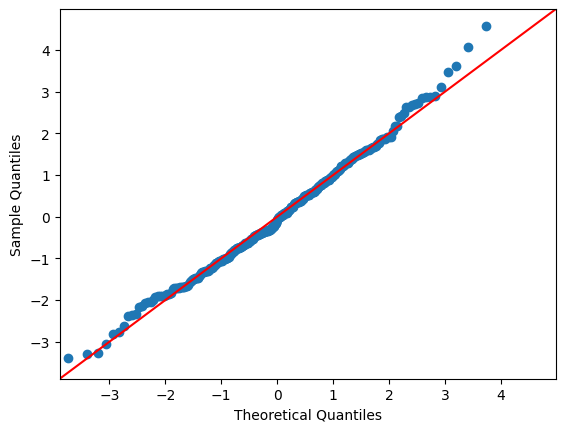

In [864]:
sm.qqplot(results.resid, line = '45', loc = np.mean(results.resid), scale = np.std(results.resid));

Widzimy, ≈ºe zar√≥wno rozk≈Çad sk≈Çadnika losowego wyglƒÖda teraz na normalny, jak i warto≈õci wok√≥≈Ç zera sƒÖ teraz rozrzucone du≈ºo bardziej r√≥wnomiernie przy wykresie wskazujƒÖcym autokorelacjƒô. Jedyne co, to zmienna jednoos_1 wyglƒÖda na nieprzydatnƒÖ, ale bez niej dwa ostatnie warunki KMRL nie bƒôdƒÖ spe≈Çnione. Przyjmƒô zatem, ≈ºe skoro uzyska≈Çem model spe≈ÇniajƒÖcy KMRL oraz przyjmujƒÖcy wysoki wsp√≥≈Çczynnik R^2, jest to m√≥j najlepszy model.

Poni≈ºsze szacunki sƒÖ na poziomie istotno≈õci 0.05.

Wsp√≥≈Çczynnik p≈Çeƒá_2 jest dodatni i wynosi ok. 1.26, co oznacza, ≈ºe bƒôdƒÖc mƒô≈ºczyznƒÖ, wydaje siƒô o 0.931-1.581 bajtalara wiƒôcej na jedzenie, przy za≈Ço≈ºeniu, ≈ºe pozosta≈Çe zmienne sƒÖ takie same.

sp√≥≈Çczynnik dzieci jest dodatni i wynosi ok. 1.46, co oznacza, ≈ºe dodatkowe dziecko zwiƒôksza miesiƒôczne wydatki na jedzenie o ok. 1.365 - 1.608 bajtalara, przy za≈Ço≈ºeniu, ≈ºe pozosta≈Çe wsp√≥≈Çczynniki siƒô nie zmieniajƒÖ.

In [893]:
s = pd.DataFrame(results.fittedvalues, columns = ['val'])
s = s.sort_values( by = 'val', ascending = False)
best10 = s[0:int(len(s)/100 * 10)]

In [894]:
best10

val
id             
73   296.562398
151  296.461396
290  295.836760
93   294.943533
184  294.723772
277  294.249589
113  294.135148
46   293.998425
297  293.577501
4    293.486145
38   293.289617
167  293.182674
43   293.181509
7    293.136948
139  293.120613
288  293.076561
29   293.074231
104  293.041523
285  292.847853
75   292.760797
141  292.755762
40   292.636574
27   292.626398
174  292.621245
140  292.375934
41   292.241902
157  292.061825
121  292.058881
293  291.961336

In [909]:
best = cleaned_df[cleaned_df.index.isin(best10.index)]
worst = cleaned_df[~cleaned_df.index.isin(best10.index)]
best

waga  wzrost  plec  dzieci  wiek   dochod  oszczednosci  jednoos  \
id                                                                       
4    80.84  179.87     2       2    56   793.26         17.62        0   
7    82.98  180.11     2       2    53   851.37        124.69        0   
27   77.56  174.66     1       3    59   771.06        -30.43        0   
29   81.71  172.90     1       3    58   870.96        104.67        0   
38   78.19  166.01     1       0    42   895.58        121.05        0   
40   85.36  173.44     2       1    46   860.05         10.34        0   
41   78.92  171.62     2       3    49   972.79        296.96        0   
43   80.85  181.16     2       4    56   854.03        -10.40        0   
46   80.17  166.13     1       5    58   836.55        126.50        0   
73   81.71  182.56     2       4    55  1000.66        242.44        0   
75   80.41  177.35     2       1    51  1064.46        324.72        0   
93   81.22  164.08     1       5    54  1035.88        184.96        0   
104  80.34  176.49     2       3    52   978.08        116.21        0   
113  86.06  182.83     2       2    45  1051.55        347.82        0   
121  80.40  181.58     2       2    58  1120.27        385.12        0   
139  80.57  173.76     2       5    51  1127.22        466.70        0   
140  79.30  172.34     1       3    60  1025.89        267.76        0   
141  77.93  159.97     1       2    54  1093.35        303.38        0   
151  83.95  173.29     2       4    56  1159.49        383.27        0   
157  82.15  177.47     2       3    65  1144.22        392.13        0   
167  79.23  177.78     2       1    48  1264.95        536.29        1   
174  80.24  165.34     1       0    44  1258.35        464.58        0   
184  80.29  176.83     2       3    55  1275.33        531.28        1   
277  85.30  175.28     2       2    43  2322.27       1625.12        1   
285  83.62  178.11     2       2    52  2535.06       1692.91        1   
288  81.70  174.57     2       2    57  2863.30       2067.71        1   
290  79.12  172.57     2       4    55  2855.78       2122.16        1   
293  79.02  168.52     1       4    47  2930.63       2265.98        1   
297  81.85  169.95     1       3    56  3243.21       2482.30        1   

     miejsce  wydatki_zyw  
id                         
4          3       293.88  
7          2       293.29  
27         1       293.62  
29         2       296.54  
38         1       293.64  
40         3       291.85  
41         2       289.42  
43         2       292.60  
46         2       296.73  
73         2       295.74  
75         3       291.41  
93         3       296.80  
104        3       291.89  
113        1       294.43  
121        2       291.90  
139        2       293.44  
140        1       292.63  
141        3       294.04  
151        2       296.11  
157        3       292.15  
167        3       291.05  
174        3       292.85  
184        2       293.73  
277        2       295.28  
285        1       292.82  
288        3       292.49  
290        1       294.27  
293        2       292.09  
297        2       292.73

In [912]:
worst.describe()

waga      wzrost        plec      dzieci        wiek  \
count  267.000000  267.000000  267.000000  267.000000  267.000000   
mean    79.704345  172.743858    1.445693    1.928839   56.659176   
std      3.315402    7.008358    0.497975    1.308802    6.623036   
min     71.380000  155.670000    1.000000    0.000000   37.000000   
25%     77.240000  167.035000    1.000000    1.000000   52.000000   
50%     79.780000  172.570000    1.000000    2.000000   57.000000   
75%     82.085000  178.365000    2.000000    3.000000   61.000000   
max     86.730000  190.790000    2.000000    5.000000   75.000000   

            dochod  oszczednosci     jednoos     miejsce  wydatki_zyw  
count   267.000000    267.000000  267.000000  267.000000   267.000000  
mean   1330.133109    868.210112    0.419476    1.988764   229.877640  
std     521.194622    580.061635    0.494400    0.738232    56.009818  
min     645.270000   -204.240000    0.000000    1.000000    56.270000  
25%     965.305000    445.540000    0.000000    1.000000   199.030000  
50%    1182.430000    749.390000    0.000000    2.000000   243.270000  
75%    1588.235000   1215.185000    1.000000    3.000000   277.515000  
max    3467.620000   2729.540000    1.000000    3.000000   293.300000

In [911]:
best.describe()

waga      wzrost       plec     dzieci       wiek       dochod  \
count  29.000000   29.000000  29.000000  29.000000  29.000000    29.000000   
mean   81.068621  174.019655   1.655172   2.689655  52.931034  1381.227586   
std     2.205120    5.848678   0.483725   1.365479   5.580137   757.957516   
min    77.560000  159.970000   1.000000   0.000000  42.000000   771.060000   
25%    79.300000  171.620000   1.000000   2.000000  49.000000   895.580000   
50%    80.570000  174.570000   2.000000   3.000000  54.000000  1064.460000   
75%    81.850000  177.780000   2.000000   4.000000  56.000000  1264.950000   
max    86.060000  182.830000   2.000000   5.000000  65.000000  3243.210000   

       oszczednosci    jednoos    miejsce  wydatki_zyw  
count     29.000000  29.000000  29.000000    29.000000  
mean     619.442759   0.275862   2.137931   293.428276  
std      768.829989   0.454859   0.742781     1.794922  
min      -30.430000   0.000000   1.000000   289.420000  
25%      124.690000   0.000000   2.000000   292.150000  
50%      324.720000   0.000000   2.000000   293.290000  
75%      531.280000   1.000000   3.000000   294.270000  
max     2482.300000   1.000000   3.000000   296.800000

Statystyczny Bajtocjak spo≈õr√≥d 10% najwiƒôcej wydajƒÖcych na jedzenie spo≈õr√≥d modelu:
- wa≈ºy ok. 1kg wiƒôcej od statystycznego z pozosta≈Çych 90%
- jest czƒô≈õciej mƒô≈ºczyznƒÖ
- ma ≈õrednio o prawie jedno dziecko wiƒôcej od statystycznego z pozosta≈Çych 90%
- jest ≈õrednio o ok. 3.5 lata m≈Çodszy od pozosta≈Çych 90%
- ma podobny doch√≥d, natomiast oszczƒôdza o ponad 200 bajtalar√≥w mniej  ni≈º statystyczny z pozosta≈Çych 90%
- rzadziej mieszka w mieszkaniu jednoosobowym.